In [152]:
import pandas as pd
from apyori import apriori
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
import ace_tools_open as tools
import matplotlib.pyplot as plt



In [139]:
movies_df = pd.read_csv('movies.csv', encoding='ISO-8859-1')  

movies_df.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354.0,98,False,...,20.880,1995-12-09,5.7,2077,2,2,1,25,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938.0,110,False,...,9.596,1993-10-15,6.5,223,3,3,2,15,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007.0,121,NaN,...,100.003,1977-05-25,8.2,16598,3,2,1,105,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536.0,100,NaN,...,134.435,2003-05-30,7.8,15928,2,1,1,24,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716.0,142,False,...,58.751,1994-07-06,8.5,22045,3,2,1,76,18,48


In [140]:

# Selección de variables categóricas y separación de valores múltiples
categorical_columns = [
    "genres", "actors", "productionCompany", "productionCompanyCountry",
    "productionCountry", "originalLanguage"
]

# Separar valores múltiples en listas para las columnas que contienen múltiples valores
for col in ["genres", "actors", "productionCompany", "productionCompanyCountry", "productionCountry"]:
    movies_df[col] = movies_df[col].fillna("").apply(lambda x: [item for item in x.split("|") if item] if isinstance(x, str) else [])


# Variables numéricas que serán discretizadas
numerical_columns = [
    "budget", "revenue", "popularity", "voteAvg", "voteCount",
    "runtime", "genresAmount", "productionCoAmount", "productionCountriesAmount",
    "actorsAmount", "castWomenAmount", "castMenAmount"
]

# Eliminar filas que aún contengan valores NaN
movies_df.dropna(subset=categorical_columns + numerical_columns, inplace=True)

# Convertir todas las columnas numéricas a valores numéricos, forzando errores a NaN
for col in numerical_columns:
    movies_df[col] = pd.to_numeric(movies_df[col], errors='coerce')

# Rellenar valores NaN con la mediana para evitar problemas en la discretización
for col in numerical_columns:
    movies_df[col].fillna(movies_df[col].median(), inplace=True)

# Aplicar KBinsDiscretizer para dividir las variables numéricas en 3 grupos (bajo, medio, alto)
discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="uniform")
movies_df[numerical_columns] = discretizer.fit_transform(movies_df[numerical_columns])

# Convertir los valores discretizados en etiquetas "Bajo", "Medio", "Alto"
bin_labels = ["Bajo", "Medio", "Alto"]
for col in numerical_columns:
    movies_df[col] = movies_df[col].apply(lambda x: bin_labels[int(x)])

# Mostrar las primeras filas después de la transformación
movies_df.head()


C:\Users\n8nug\AppData\Local\Temp\ipykernel_30584\1275234094.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_df[col].fillna(movies_df[col].median(), inplace=True)
C:\Users\n8nug\AppData\Local\Temp\ipykernel_30584\1275234094.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,Bajo,"[Crime, Comedy]",https://www.miramax.com/movie/four-rooms/,"[Miramax, A Band Apart]","[US, US]",[United States of America],Bajo,Bajo,False,...,Bajo,1995-12-09,Medio,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo
1,6,Bajo,"[Action, Thriller, Crime]",NaN,"[Universal Pictures, Largo Entertainment, JVC]","[US, US, JP]","[Japan, United States of America]",Bajo,Bajo,False,...,Bajo,1993-10-15,Medio,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo
2,11,Bajo,"[Adventure, Action, Science Fiction]",http://www.starwars.com/films/star-wars-episod...,"[Lucasfilm, 20th Century Fox]","[US, US]",[United States of America],Bajo,Bajo,NaN,...,Bajo,1977-05-25,Alto,Medio,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo
3,12,Bajo,"[Animation, Family]",http://movies.disney.com/finding-nemo,[Pixar],[US],[United States of America],Bajo,Bajo,NaN,...,Bajo,2003-05-30,Alto,Medio,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo
4,13,Bajo,"[Comedy, Drama, Romance]",NaN,"[Paramount, The Steve Tisch Company]",[US],[United States of America],Bajo,Bajo,False,...,Bajo,1994-07-06,Alto,Alto,Bajo,Bajo,Bajo,Bajo,Bajo,Bajo


In [141]:
for col in numerical_columns:
    categories = movies_df[col].unique()
    print(f"Categorías para {col}: {sorted(categories)}")

Categorías para budget: ['Alto', 'Bajo', 'Medio']
Categorías para revenue: ['Alto', 'Bajo', 'Medio']
Categorías para popularity: ['Alto', 'Bajo', 'Medio']
Categorías para voteAvg: ['Alto', 'Bajo', 'Medio']
Categorías para voteCount: ['Alto', 'Bajo', 'Medio']
Categorías para runtime: ['Alto', 'Bajo', 'Medio']
Categorías para genresAmount: ['Alto', 'Bajo', 'Medio']
Categorías para productionCoAmount: ['Alto', 'Bajo', 'Medio']
Categorías para productionCountriesAmount: ['Alto', 'Bajo', 'Medio']
Categorías para actorsAmount: ['Alto', 'Bajo', 'Medio']
Categorías para castWomenAmount: ['Alto', 'Bajo', 'Medio']
Categorías para castMenAmount: ['Alto', 'Bajo', 'Medio']


In [142]:
# # Filtrar valores poco frecuentes antes de Apriori
# min_occurrences = 100  # Cambia según el dataset
# for col in categorical_columns:
#     all_values = pd.Series([item for sublist in movies_df[col] for item in sublist])
#     frequent_values = set(all_values[all_values.map(all_values.value_counts()) > min_occurrences])
#     movies_df[col] = movies_df[col].apply(lambda x: [item for item in x if item in frequent_values])


In [143]:
# Construcción de transacciones para Apriori
# Construcción de transacciones usando apply()
movies_df["transactions"] = movies_df.apply(lambda row: set(
    [item for col in categorical_columns if isinstance(row[col], list) for item in row[col]] +
    [f"{col}_{row[col]}" for col in numerical_columns]
), axis=1)

# Convertir la columna en una lista de listas para Apriori
transactions = movies_df["transactions"].tolist()
# Filtrar transacciones vacías o con muy pocos elementos
transactions = [t for t in transactions if len(t) > 1]



In [144]:
# Aplicar el algoritmo Apriori con diferentes niveles de soporte y confianza
rules = apriori(transactions, min_support=0.2, min_confidence=0.7, max_length=5)
rules_list = list(rules)


In [148]:
def extract_apriori_results(output):
    # Filtrar reglas donde LHS (antecedentes) no está vacío
    valid_rules = [rule for rule in output if rule[2] and rule[2][0][0]]
    
    lhs = [", ".join(rule[2][0][0]) for rule in valid_rules]
    rhs = [", ".join(rule[2][0][1]) for rule in valid_rules]
    support = [rule[1] for rule in valid_rules]
    confidence = [rule[2][0][2] for rule in valid_rules]
    lift = [rule[2][0][3] for rule in valid_rules]
    
    return pd.DataFrame(zip(lhs, rhs, support, confidence, lift), columns=['LHS', 'RHS', 'Soporte', 'Confianza', 'Lift'])

rules_df = extract_apriori_results(rules_list)



In [149]:
# Mostrar resultados
tools.display_dataframe_to_user(name="Reglas de Asociación", dataframe=rules_df)

Reglas de Asociación


In [147]:
print("Distribución de longitud de transacciones:")
print(pd.Series([len(t) for t in transactions]).value_counts())

Distribución de longitud de transacciones:
36     286
34     279
37     273
35     272
33     268
      ... 
168      1
147      1
180      1
247      1
182      1
Name: count, Length: 170, dtype: int64


In [169]:
# Definir umbrales recomendados (ajústalos si es necesario)
min_support = 0.2  # Al menos en el 5% de las transacciones
min_confidence = 0.7  # Al menos 70% de confianza
min_lift = 1.2  # Lift mayor que 1 indica que hay una buena relación

# Filtrar reglas
filtered_rules = rules_df[
    (rules_df["Soporte"] >= min_support) & 
    (rules_df["Confianza"] >= min_confidence) & 
    (rules_df["Lift"] > min_lift)
]

# Mostrar reglas filtradas
tools.display_dataframe_to_user(name="Reglas de Asociación Filtradas", dataframe=filtered_rules)


Reglas de Asociación Filtradas


Text(0.5, 1.0, 'Distribución de Lift')

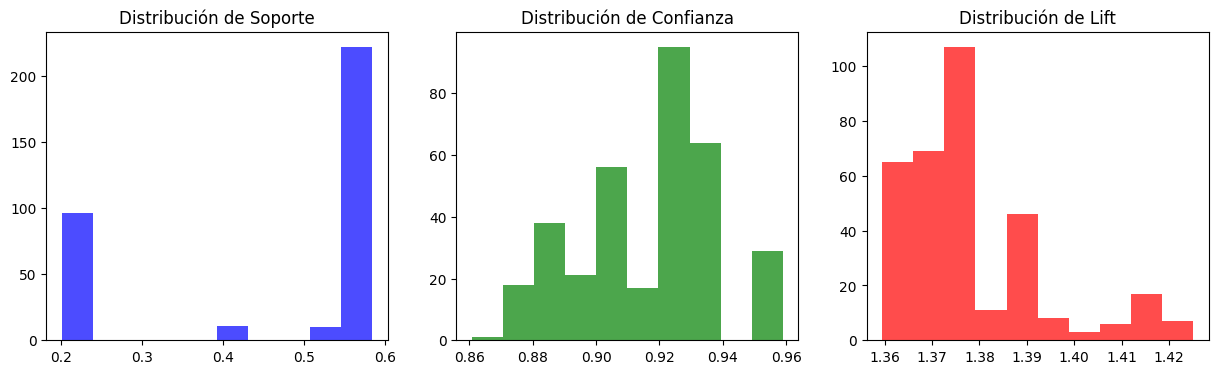

In [153]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(filtered_rules["Soporte"], bins=10, color="blue", alpha=0.7)
axes[0].set_title("Distribución de Soporte")

axes[1].hist(filtered_rules["Confianza"], bins=10, color="green", alpha=0.7)
axes[1].set_title("Distribución de Confianza")

axes[2].hist(filtered_rules["Lift"], bins=10, color="red", alpha=0.7)
axes[2].set_title("Distribución de Lift")

Una vez obtenidas las reglas, comparamos estas reglas con diferentes niveles de soporte y confianza

In [165]:
# Probar con diferentes configuraciones de soporte y confianza
configuraciones = [
    {"min_support": 0.05, "min_confidence": 0.7},
    {"min_support": 0.1, "min_confidence": 0.7},
    {"min_support": 0.3, "min_confidence": 0.7},
]

In [166]:
# Almacenar cantidad de reglas en cada configuración
resultados = []
for config in configuraciones:
    filtered_rules = rules_df[
        (rules_df["Soporte"] >= config["min_support"]) & 
        (rules_df["Confianza"] >= config["min_confidence"]) & 
        (rules_df["Lift"] > 1)
    ]
    resultados.append({"Soporte": config["min_support"], "Confianza": config["min_confidence"], "Reglas": len(filtered_rules)})

# Convertir resultados en DataFrame
resultados_df = pd.DataFrame(resultados)
tools.display_dataframe_to_user(name="Variación de Reglas con Soporte y Confianza", dataframe=resultados_df)

Variación de Reglas con Soporte y Confianza


In [167]:
items_mas_frecuentes = rules_df["LHS"].explode().value_counts()
print("Variables más frecuentes en LHS:\n", items_mas_frecuentes.head(10))

Variables más frecuentes en LHS:
 LHS
Comedy                      1021
US                           969
United States of America     774
Thriller                     757
Action                       561
Drama                        561
voteAvg_Alto                 561
voteAvg_Medio                561
US, Drama                    298
Comedy, US                   250
Name: count, dtype: int64
